# Entropy table

This section reproduces table 1 from the paper, as well as the results used for fig. 4.

In [ ]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from src.dynamical_transfer_matrix_ECA import *
from visualization import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class_1 = [0, 8, 32, 40, 72, 104, 128, 136, 160, 168, 200, 232]
class_2 = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 73, 74, 76, 77, 78, 94, 108, 130, 132, 134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 204]
class_3=[18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class_4=[54, 106, 110]
all_rules=np.sort(class_1+class_2+class_3+class_4)

In [3]:
class_1_entropy = []
class_2_entropy = []
class_3_entropy = []
class_4_entropy = []

In [ ]:
max_p=7
max_c=5
max_p_plus_c_no_translation=8

max_p_plus_c_translation=7

labels=[]
for c in range(1,max_c+1):
    for p in range(max_p+1):
        if p+c > max_p_plus_c_no_translation:
            break
        labels.append(f"p={p}, c={c} no translation")

for c in range(1,max_c+1):
    for p in range(max_p+1):
        if p+c > max_p_plus_c_translation:
            break
        labels.append(f"p={p}, c={c}, left translation")

for c in range(1,max_c+1):
    for p in range(max_p+1):
        if p+c > max_p_plus_c_translation:
            break
        labels.append(f"p={p}, c={c}, right translation")

for c in range(1,max_c+1):
    for p in range(max_p+1):
        if p+c > max_p_plus_c_translation:
            break
        labels.append(f"p={p}, c={c}, left-2 translation")

for c in range(1,max_c+1):
    for p in range(max_p+1):
        if p+c > max_p_plus_c_translation:
            break
        labels.append(f"p={p}, c={c}, right-2 translation")

In [ ]:
table_entropy=[]
table_density=[]

for rule in all_rules:
    print('='*20)
    print(f"Rule {rule}")
    print('='*20)
    rule_our_notation=list(map(int, list(f'{rule:08b}')))
    rule_our_notation.reverse() # To go to our convention
    result_entropy=[]
    result_density=[]
    print('___ NO TRANSLATION ___')
    for c in range(1,max_c+1):
        for p in range(max_p+1):
            if p+c > max_p_plus_c_no_translation:
                break
            try:
                entropy, density = entropy_and_density(rule_our_notation, p, c, 0)
                result_density.append(density)
                result_entropy.append(entropy)
            except:
                result_entropy.append(np.nan)
                result_density.append(np.nan)
            print(f"p={p}, c={c} no translation, entropy={result_entropy[-1]}, density={result_density[-1]}")
    print('___ LEFT TRANSLATION ___')
    for c in range(1,max_c+1):
        for p in range(max_p+1):
            if p+c > max_p_plus_c_translation:
                break
            try:
                entropy, density = entropy_and_density_translation_left(rule_our_notation, p, c, 0)
                result_entropy.append(entropy)
                result_density.append(density)
            except:
                result_entropy.append(np.nan)
                result_density.append(np.nan)
            print(f"p={p}, c={c} left translation, entropy={result_entropy[-1]}, density={result_density[-1]}")
    print('___ RIGHT TRANSLATION ___')
    for c in range(1,max_c+1):
        for p in range(max_p+1):
            if p+c > max_p_plus_c_translation:
                break
            try:
                entropy, density = entropy_and_density_translation_right(rule_our_notation, p, c, 0)
                result_entropy.append(entropy)
                result_density.append(density)
            except:
                result_entropy.append(np.nan)
                result_density.append(np.nan)
            print(f"p={p}, c={c} right translation, entropy={result_entropy[-1]}, density={result_density[-1]}")
    print('___ LEFT-2 TRANSLATION ___')
    for c in range(1,max_c+1):
        for p in range(max_p+1):
            if p+c > max_p_plus_c_translation:
                break
            try:
                entropy, density = entropy_and_density_translation_left_2(rule_our_notation, p, c, 0)
                result_entropy.append(entropy)
                result_density.append(density)
            except:
                result_entropy.append(np.nan)
                result_density.append(np.nan)
            print(f"p={p}, c={c} left-2 translation, entropy={result_entropy[-1]}, density={result_density[-1]}")
    print('___ RIGHT-2 TRANSLATION ___')
    for c in range(1,max_c+1):
        for p in range(max_p+1):
            if p+c > max_p_plus_c_translation:
                break
            try:
                entropy, density = entropy_and_density_translation_right_2(rule_our_notation, p, c, 0)
                result_entropy.append(entropy)
                result_density.append(density)
            except:
                result_entropy.append(np.nan)
                result_density.append(np.nan)
            print(f"p={p}, c={c} right-2 translation, entropy={result_entropy[-1]}, density={result_density[-1]}")
    class_=0
    if rule in class_1:
        class_=1
    elif rule in class_2:
        class_=2
    elif rule in class_3:
        class_=3
    elif rule in class_4:
        class_=4
    # Appen result to the table
    table_entropy.append([rule]+[class_]+result_entropy)
    table_density.append([rule]+[class_]+result_density)

Rule 0
___ NO TRANSLATION ___
p=0, c=1 no translation, entropy=0.0, density=-1.1102230246251565e-10
___ LEFT TRANSLATION ___
p=0, c=1 left translation, entropy=2.2204460492503128e-16, density=-4.440892098500626e-10
___ RIGHT TRANSLATION ___
p=0, c=1 right translation, entropy=4.440892098500625e-16, density=-6.661338147750939e-10
___ LEFT-2 TRANSLATION ___
p=0, c=1 left-2 translation, entropy=-1.1102230246251565e-16, density=1.1102230246251565e-10
___ RIGHT-2 TRANSLATION ___
p=0, c=1 right-2 translation, entropy=0.0, density=-1.1102230246251565e-10
Rule 1
___ NO TRANSLATION ___
p=0, c=1 no translation, entropy=-14.188696716213027, density=313430.130850886
___ LEFT TRANSLATION ___
p=0, c=1 left translation, entropy=-10.252298274582044, density=801361.572546453
___ RIGHT TRANSLATION ___
p=0, c=1 right translation, entropy=-10.820875200402682, density=1873478.7466985844
___ LEFT-2 TRANSLATION ___
p=0, c=1 left-2 translation, entropy=-13.361963850558405, density=245376.65136291942
___ RIGHT

,Rule,Class,"p=0, c=1 no translation","p=0, c=1, left translation","p=0, c=1, right translation","p=0, c=1, left-2 translation","p=0, c=1, right-2 translation"
50,73,2,1.994606e-01,-1.915321e+01,-9.883022e+00,1.994606e-01,1.994606e-01
51,74,2,7.231341e-09,3.822451e-01,1.332268e-15,0.000000e+00,4.259801e-09
52,76,2,6.093779e-01,0.000000e+00,8.881784e-16,6.093779e-01,6.093779e-01
53,77,2,4.812118e-01,-1.326194e+01,-1.367146e+01,4.812118e-01,4.812118e-01
54,78,2,2.811996e-01,-9.992007e-16,-2.220446e-16,2.811996e-01,2.811996e-01
55,90,3,0.000000e+00,2.220446e-16,2.220446e-16,-1.110223e-16,-1.110223e-16
56,94,2,2.811996e-01,-6.661338e-16,-6.661338e-16,2.811996e-01,2.811996e-01
57,104,1,3.222846e-01,4.440892e-16,2.954649e-09,3.222846e-01,3.222846e-01
58,105,3,0.000000e+00,0.000000e+00,0.000000e+00,-7.771561e-16,-1.110223e-16
59,106,4,-4.440892e-16,4.812118e-01,6.661338e-16,-4.440892e-16,-4.440892e-16


In [78]:
table=pd.DataFrame(table_entropy, columns=['Rule', 'Class']+labels)
table.to_csv('table_entropy.csv', index=False)
table_density=pd.DataFrame(table_density, columns=['Rule', 'Class']+labels)
table_density.to_csv('table_density.csv', index=False)
table.iloc[:10]

,Rule,Class,"p=0, c=1 no translation","p=0, c=1, left translation","p=0, c=1, right translation","p=0, c=1, left-2 translation","p=0, c=1, right-2 translation"
0,0,1,0.000000e+00,2.220446e-16,4.440892e-16,-1.110223e-16,0.000000e+00
1,1,2,-1.418870e+01,-1.025230e+01,-1.082088e+01,-1.336196e+01,-1.399508e+01
2,2,2,2.220446e-16,3.822451e-01,-1.221245e-15,4.440892e-16,0.000000e+00
3,3,2,-3.795148e+01,1.332268e-15,-1.369372e+01,-4.074177e+01,-3.841865e+01
4,4,2,4.812118e-01,4.440892e-16,-9.992007e-16,4.812118e-01,4.812118e-01
5,5,2,2.811996e-01,-9.680632e+00,-9.968901e+00,2.811996e-01,2.811996e-01
6,6,2,-2.220446e-16,1.776357e-15,-1.110223e-16,-2.220446e-16,0.000000e+00
7,7,2,0.000000e+00,-8.521016e+00,-1.495617e+01,-2.220446e-16,-2.220446e-16
8,8,1,-1.110223e-16,-1.110223e-16,-2.220446e-16,8.881784e-16,8.881784e-16
9,9,2,-9.492264e+00,-8.117368e+00,-1.031730e+01,-9.930979e+00,-9.268289e+00


# Entropy density vs density of initial alive cells

In [1]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from src.dynamical_transfer_matrix_ECA import *
from src.visualization import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rule=128
rule_our_notation=list(map(int, list(f'{rule:08b}')))
rule_our_notation.reverse() # To go to our convention

In [3]:
def s_given_rho(rule, p, c, objective_rho, mu_min=-15, mu_max=15, eps=1e-3, max_iter=1000):
    """
    Find s such that the resulting rho matches objective_rho using bisection on mu.
    """
    num_iter = 0
    while num_iter < max_iter:
        mu = (mu_min + mu_max) / 2
        s, trial_rho = entropy_and_density(rule=rule, p=p, c=c, mu=mu, method_derivative='Hellmann-Feynman')

        diff = trial_rho - objective_rho
        if np.abs(diff) < eps:
            print(f"Converged: mu={mu}, rho trial={trial_rho}, objective rho={objective_rho}, diff={np.abs(diff)}")
            return s

        if diff > 0:
            mu_max = mu
        else:
            mu_min = mu

        num_iter += 1

    print(f"Warning: max_iter reached. mu={mu}, rho trial={trial_rho}, objective rho={objective_rho}, diff={np.abs(diff)}")
    return np.nan

In [4]:
def s_given_rho_all_0_stationary(rule, p, c, objective_rho, mu_min=-15, mu_max=15, eps=1e-3, max_iter=1000):
    """
    Find s such that the resulting rho matches objective_rho using bisection on mu.
    """
    num_iter = 0
    while num_iter < max_iter:
        mu = (mu_min + mu_max) / 2
        s, trial_rho = entropy_and_density_ending_all_0(rule=rule, p=p, c=c, mu=mu, method_derivative='Hellmann-Feynman')

        diff = trial_rho - objective_rho
        if np.abs(diff) < eps:
            print(f"Converged: mu={mu}, rho trial={trial_rho}, objective rho={objective_rho}, diff={np.abs(diff)}")
            return s

        if diff > 0:
            mu_max = mu
        else:
            mu_min = mu

        num_iter += 1

    print(f"Warning: max_iter reached. mu={mu}, rho trial={trial_rho}, objective rho={objective_rho}, diff={np.abs(diff)}")
    return np.nan

In [ ]:
s_list_all=[]
rho_list=np.linspace(0, 1, 50)
c=1
p_max=5
for p in range(1,p_max+1):
    print('='*20)
    print(f"p={p}")
    print('='*20)
    s_list=[]
    for rho in rho_list:
        print(f"rho={rho}")
        s_list.append(s_given_rho(rule=rule_our_notation, p=p, c=c, objective_rho=rho, mu_min=-15, mu_max=15, eps=1e-3, max_iter=1000))
    s_list_all.append(s_list)
df=pd.DataFrame(s_list_all, columns=rho_list, index=[f"p={p}" for p in range(1,p_max+1)])
df.to_csv(f's_given_rho_rule_{rule}.csv', index=True)

p=1
rho=0.0
Converged: mu=-7.5, rho trial=0.0005527781308488574, objective rho=0.0, diff=0.0005527781308488574
rho=0.02040816326530612
Converged: mu=-3.8671875, rho trial=0.020463970195057513, objective rho=0.02040816326530612, diff=5.580692975139245e-05
rho=0.04081632653061224
Converged: mu=-3.1640625, rho trial=0.04035923564941052, objective rho=0.04081632653061224, diff=0.000457090881201723
rho=0.061224489795918366
Converged: mu=-2.724609375, rho trial=0.06093358427428287, objective rho=0.061224489795918366, diff=0.00029090552163549277
rho=0.08163265306122448
Converged: mu=-2.40234375, rho trial=0.08159036051026163, objective rho=0.08163265306122448, diff=4.2292550962858e-05
rho=0.1020408163265306
Converged: mu=-2.138671875, rho trial=0.10267411209218516, objective rho=0.1020408163265306, diff=0.0006332957656545596
rho=0.12244897959183673
Converged: mu=-1.93359375, rho trial=0.12190196780810483, objective rho=0.12244897959183673, diff=0.0005470117837318988
rho=0.14285714285714285
Co

In [ ]:
s_list_all=[]
rho_list=np.linspace(0, 1, 50)
c=1
p_max=5
for p in range(1,p_max+1):
    print('='*20)
    print(f"p={p}")
    print('='*20)
    s_list=[]
    for rho in rho_list:
        print(f"rho={rho}")
        s_list.append(s_given_rho_all_0_stationary(rule=rule_our_notation, p=p, c=c, objective_rho=rho, mu_min=-15, mu_max=15, eps=1e-3, max_iter=1000))
    s_list_all.append(s_list)
df=pd.DataFrame(s_list_all, columns=rho_list, index=[f"p={p}" for p in range(1,p_max+1)])
df.to_csv(f's_given_rho_rule_{rule}_ending_all_0.csv', index=True)

p=1
rho=0.0
Converged: mu=-7.5, rho trial=0.0005527781308488574, objective rho=0.0, diff=0.0005527781308488574
rho=0.02040816326530612
Converged: mu=-3.8671875, rho trial=0.02046397019505752, objective rho=0.02040816326530612, diff=5.580692975139939e-05
rho=0.04081632653061224
Converged: mu=-3.1640625, rho trial=0.040359235649410505, objective rho=0.04081632653061224, diff=0.00045709088120173685
rho=0.061224489795918366
Converged: mu=-2.724609375, rho trial=0.06093358427428294, objective rho=0.061224489795918366, diff=0.0002909055216354234
rho=0.08163265306122448
Converged: mu=-2.40234375, rho trial=0.08159036051026156, objective rho=0.08163265306122448, diff=4.229255096292739e-05
rho=0.1020408163265306
Converged: mu=-2.138671875, rho trial=0.10267411209218506, objective rho=0.1020408163265306, diff=0.0006332957656544624
rho=0.12244897959183673
Converged: mu=-1.93359375, rho trial=0.12190196780810483, objective rho=0.12244897959183673, diff=0.0005470117837318988
rho=0.14285714285714285

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [8]:
import pandas

In [9]:
df=pandas.DataFrame(s_list_all, columns=rho_list, index=[f"p={p}" for p in range(1,p_max+1)])
df.to_csv(f's_given_rho_rule_{rule}_ending_all_0.csv', index=True)

In [7]:
s_list_all 

[[np.float64(0.004698767287911436),
  np.float64(0.09983094181392325),
  np.float64(0.16902062265742868),
  np.float64(0.22931292902985329),
  np.float64(0.28212433247216756),
  np.float64(0.3299075334549182),
  np.float64(0.36901480911603324),
  np.float64(0.40880274935710953),
  np.float64(0.44255593482664735),
  np.float64(0.4724544651977069),
  np.float64(0.49818478053313975),
  np.float64(0.5220243615482967),
  np.float64(0.5435243381316647),
  np.float64(0.5605592621663145),
  np.float64(0.5766460102152544),
  np.float64(0.5884119555413148),
  np.float64(0.5983866202362267),
  np.float64(0.6051071580929506),
  np.float64(0.6086710300537862),
  np.float64(0.6092515952786836),
  np.float64(0.6067207590389749),
  np.float64(0.600584100459595),
  np.float64(0.5914136441575933),
  np.float64(0.5775551754730714),
  np.float64(0.5597564269606943),
  np.float64(0.5369333822296283),
  np.float64(0.5108041366181577),
  np.float64(0.4744685231018215),
  np.float64(0.4349461916525772),
  np.

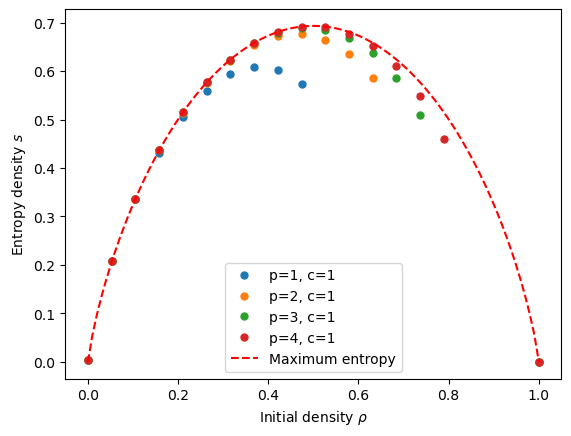

In [6]:
for idx, p in enumerate(range(1,p_max)):
    plt.plot(rho_list, s_list_all[idx], marker='.', linestyle='', markersize=10, label=f'p={p}, c=1')

plt.plot(np.linspace(0,1,100), np.log(1/(np.linspace(0,1,100)**np.linspace(0,1,100)*(1-np.linspace(0,1,100))**(1-np.linspace(0,1,100)))), color='r', linestyle='--', label='Maximum entropy')
plt.xlabel(r'Initial density $\rho$')
plt.ylabel(r'Entropy density $s$')
plt.legend();